In [19]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
plt.style.use('seaborn-dark')
%matplotlib inline

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/A%20Waiter's%20Tips/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [22]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [23]:
def create_graph(column, color):
    
    tip_gen = df.groupby(column)['tip'].mean()

    plt.figure(figsize=(6,4))
    plt.bar(list(tip_gen.index),list(tip_gen), width=0.4, color = color)
    plt.title(f'Tip v/s {column}')
    plt.xlabel(column)
    plt.ylabel('Tip (in $)')
    plt.show()

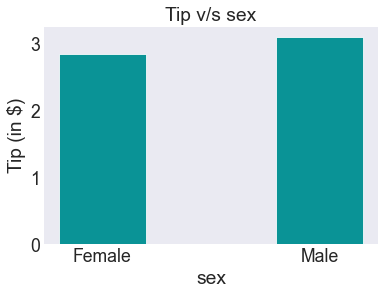

In [24]:
create_graph('sex', '#0a9396')

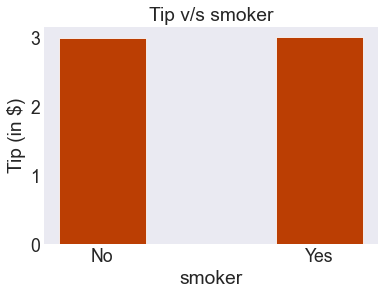

In [25]:
create_graph('smoker', '#bb3e03')

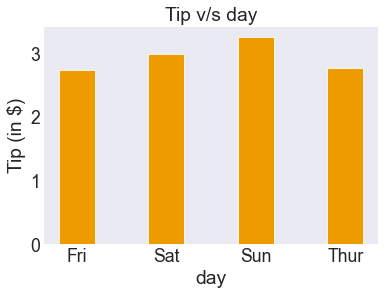

In [26]:
create_graph('day', '#ee9b00')

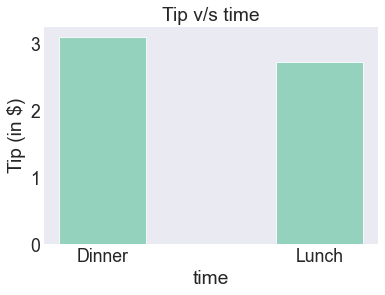

In [27]:
create_graph('time', '#94d2bd')

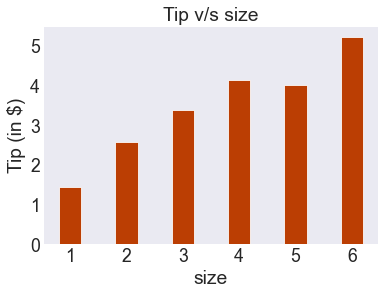

In [28]:
create_graph('size', '#bb3e03')

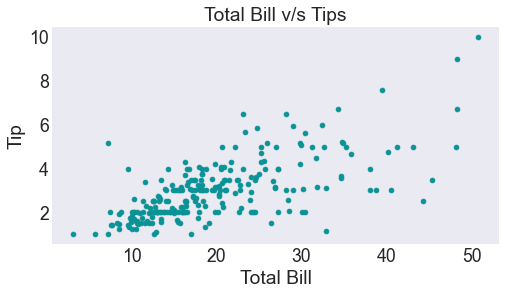

In [29]:
plt.figure(figsize=(8,4))
plt.scatter(df['total_bill'], df['tip'], color = '#0a9396')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill v/s Tips')
plt.show()

In [30]:

df['sex'] = df['sex'].map({'Male':0, 'Female':1})
df['smoker'] = df['smoker'].map({'No':0, 'Yes':1})
df['day'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
df['time'] = df['time'].map({'Lunch':0, 'Dinner':1})
X = df.drop(['tip','smoker'],axis = 1).values
y = df['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
svr = SVR(kernel='rbf')

pararm_grid = {
    'C': [1,1.5,2],
    'gamma': ['scale','auto'],
    'tol': [1e-4, 1e-2, 1e-3],
}

rnd_cv = RandomizedSearchCV(estimator=svr, param_distributions= pararm_grid, cv=5, n_jobs=-1)
rnd_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 1.5, 2],
                                        'gamma': ['scale', 'auto'],
                                        'tol': [0.0001, 0.01, 0.001]})